In [9]:
from google.colab import files

# Importer les fichiers
uploaded = files.upload()

Saving bank-full.csv to bank-full (1).csv


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('bank-full.csv', delimiter=';')

# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
# Check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
# Encode categorical variables using get_dummies (one-hot encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

In [13]:
# Show the dataset after encoding
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target after encoding
y = data_encoded['y_yes']

In [15]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Build the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

In [17]:
# Train the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test data
y_pred = tree_model.predict(X_test)

# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8720141551164848
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.93      0.93     11966
        True       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564

Confusion Matrix:
 [[11086   880]
 [  856   742]]


In [25]:
# Fine-tune the model by adjusting max_depth
tree_model_tuned = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
# Predict again
y_pred_tuned = tree_model_tuned.predict(X_test)

# Evaluate the tuned model
print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred_tuned)}")

Tuned Accuracy: 0.9009879091713359


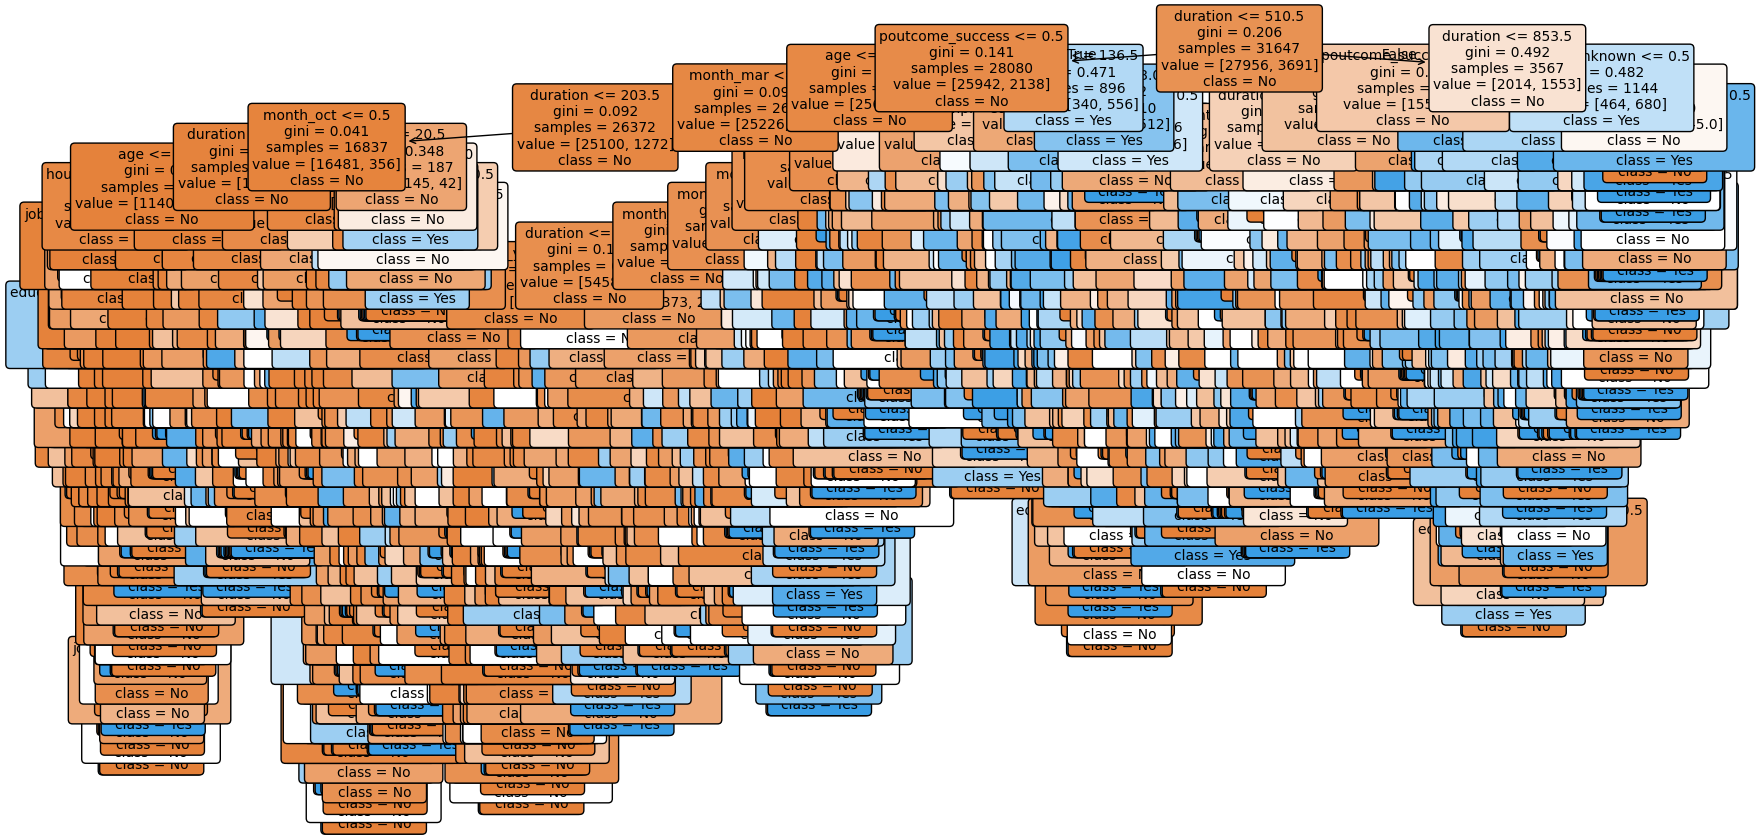

In [27]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.show()

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = tree_model_tuned.predict(X_test)

# Evaluate the model’s performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9009879091713359

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.95     11966
        True       0.65      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [32]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
# Example new customer data (custom inputs)
new_data = [[45, 'technician', 'married', 'secondary', 'no', 3000, 'yes', 'no', 'cellular', 5, 'may', 250, 1, 999, 0, 'unknown']]

#new data to dataframe
new_data_df = pd.DataFrame(new_data, columns=data.columns[:-1])

# Get all the features used during training
training_features = tree_model_tuned.feature_names_in_

# Create a DataFrame with all training features and fill missing with 0
new_data_encoded = pd.get_dummies(new_data_df, drop_first=True)
missing_cols = set(training_features) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0

# Reorder columns to match training data
new_data_encoded = new_data_encoded[training_features]

# Convert categorical data to numerical (if necessary) and make predictions
prediction = tree_model_tuned.predict(new_data_encoded)

print("Prediction for the new customer:", prediction)


Prediction for the new customer: [False]
